In [70]:
import numpy as np
import itertools as it
from random import randint
from time import time
import matplotlib.pyplot as plt

In [71]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity
    self.size = weights.size

  def solve_knapsack_brute_force(self):
    best_profit, final_weight, final_idx = 0, 0, []
    permutation = list(it.product([0,1], repeat=self.size))
    for perm in permutation:
      temp_p, temp_w, idx = 0, 0, 0
      for element in perm:
        if element:
          temp_w += self.weights[idx]
          temp_p += self.profits[idx]
        idx += 1
      if best_profit < temp_p and temp_w < self.capacity:
        best_profit = max(best_profit, temp_p)
        final_weight = temp_w
        final_idx = perm
    return [final_idx, final_weight, best_profit]



  def solve_knapsack_pw_ratio(self):
    pw_ratio = []
    idx_list = []
    for i in range(self.size):
      pw_ratio.append(self.profits[i] / self.weights[i])
      idx_list.append(i)
    zipped = list(zip(pw_ratio, self.weights, self.profits, idx_list))
    sort_zip = sorted(zipped, key=lambda x: x[0], reverse = True)
    temp_w, final_weight, best_profit, final_idx = 0, 0, 0, []
    for elem in sort_zip:
      temp_w += elem[1]
      if temp_w <= self.capacity:
        final_weight = temp_w
        best_profit += elem[2]
        final_idx.append(elem[-1]+1)
    final_idx.sort()
    return [final_idx, final_weight, best_profit]

In [72]:
def brute_force_plot():
  weights = np.array([])
  profits = np.array([])
  capacity = 10
  times = []
  for _ in range(20):
      weights = np.append(weights, [randint(1, 20)])
      profits = np.append(profits, [randint(1, 20)])
      plecak = KnapSack(profits, weights, capacity)
      start = time()
      plecak.solve_knapsack_brute_force()
      end = time()
      times.append(end - start)
  plt.scatter(range(1, 21), times)
  plt.ylabel('Czas uzyskania wyniku')
  plt.xlabel('Ilość elementów do wyboru')
  plt.show()


def pw_ratio_plot():
  weights = np.array([])
  profits = np.array([])
  capacity = 10
  times = []
  for i in range(20):
      weights = np.append(weights, [randint(1, 20)])
      profits = np.append(profits, [randint(1, 20)])
      plecak = KnapSack(profits, weights, capacity)
      start = time()
      plecak.solve_knapsack_pw_ratio()
      end = time()
      times.append(end - start)
  plt.scatter(range(1, 21), times)
  plt.ylabel('Czas uzyskania wyniku')
  plt.xlabel('Ilość elementów do wyboru')
  plt.show()

In [73]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [74]:
plecak = KnapSack(profits, weights, capacity)
ans = plecak.solve_knapsack_brute_force()
msg = f"Należy zabrać przedmioty: {ans[0]} o łącznej wadze {ans[1]} i wartości {ans[2]}"
print(msg)
ans2 = plecak.solve_knapsack_pw_ratio()
msg = f"Należy zabrać przedmioty: {ans2[0]} o łącznej wadze {ans2[1]} i wartości {ans2[2]}"
print(msg)

Należy zabrać przedmioty: (0, 1, 1, 0) o łącznej wadze 8 i wartości 17
Należy zabrać przedmioty: [2, 4] o łącznej wadze 5 i wartości 14


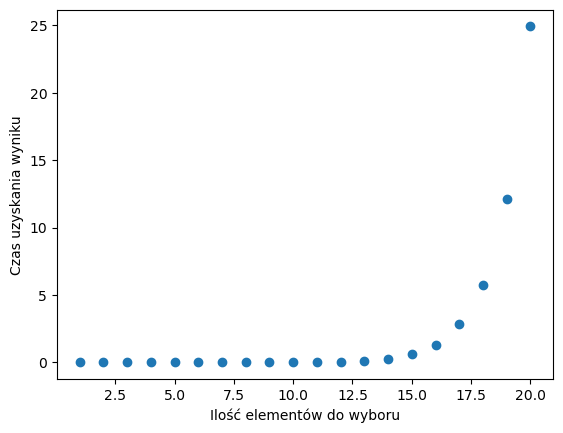

In [75]:
brute_force_plot()

Czy obie metody mają takie same rozwiązania? 
Nie, algorytmy są różne i różnie działają. Brute force będzie zwracał poprawne wyniki jednak przy większej ilości elementów czas wykonania programu rośnie eksponencjalnie. Natomiast heurystyka rozważająca stosunek zysku do wagi nie ma pewności optymalnego wyniku (będzie to wynik poprawny względem ustalonej heurystyki jednak nie mamy pewności że jest to rozwiązanie optymalne ze wszystkich dostępnych), ale czas znalezienia wyniku rośnie liniowo o ilości elementów w plecaku. 


Jakie są Pani / Pana wnioski?
Jeśli musimy mieć pewność optymalnego wyniku musimy skorzystać z algorytmu brute force. Jednak jeśli bardziej nam zależy na czasie uzyskania wyniku i optymalizacji zużycia mocy obliczeniowej, powinniśmy skorzystać z dobrze dobranej heurystyki. 